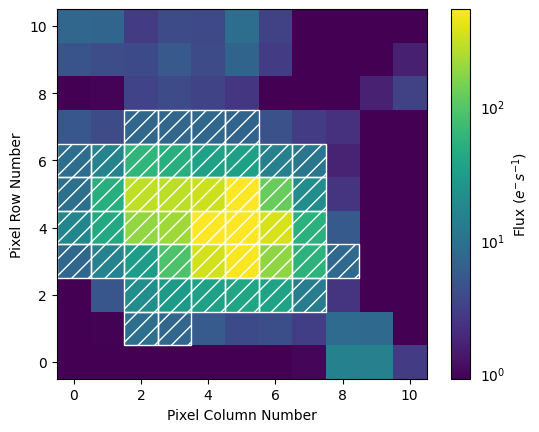

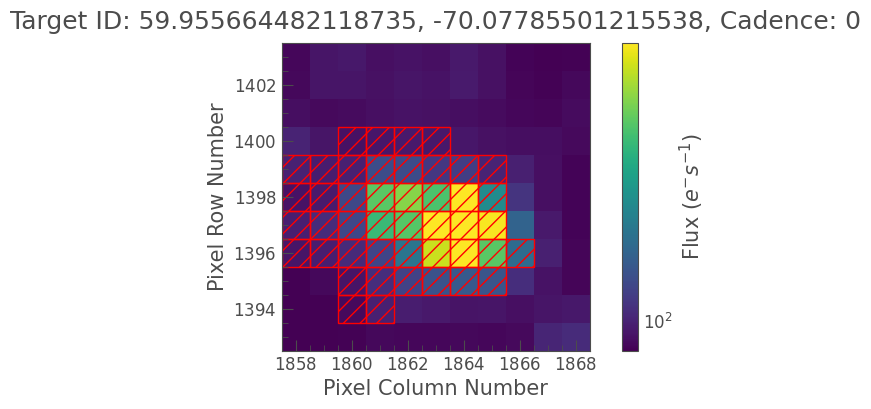

In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches

from astropy.wcs import WCS
from astropy.io import fits
import lightkurve as lk


class MyTPF(object):
    """
    Basic TPF class to give interactions similar to Lightkurve TargetPixelFiles

    Attributes
        filename (str): path to source file
        flux (ndarray): 2D array of summed flux
        pipeline_mask (ndarray): 2D boolean array indicated aperture pixels
        wcs (astropy.wcs.WCS): world coordinate system from source file
    """
    def __init__(self, filename):
        """
        Read basic TPF information from a FITS file

        Parameters:
            filename (str): full path to FITS file
        """
        with fits.open(filename) as hdul:
            self.filename = filename
            self.flux = hdul[2].data
            self.pipeline_mask = (hdul[3].data & 2).astype(bool)
            self.wcs = WCS(hdul[2])

    @property
    def shape(self):
        """Returns the (height, width) of the TPF.
        """
        return self.flux.shape
    
    def get_central_coordinate(self):
        """Returns an astropy.coordinates.SkyCoord object with the TPF central coordinates
        """
        h, w = self.shape
        return self.wcs.pixel_to_world(w//2, h//2)
    
    def plot(self, ax=None, aperture_mask="pipeline", mask_color="w", **kw):
        """
        Plot the TPF a la lightkurve.TargetPixelFile.plot

        Parameters
            ax (matplotlib axes object): axes to plot the TPF
            aperture_mask (str or ndarray): boolean array for aperture
            mask_color (str): color string for the aperture mask
            kw: other keyword arguments for lightkurve.utils.plot_image

        Returns
            ax (matplotlib axes): the plot axes
        """
        ax = lk.utils.plot_image(self.flux, ax=ax, **kw)

        if aperture_mask is not None:
            if aperture_mask == "pipeline":
                aperture_mask = self.pipeline_mask
            ax = self._plot_aperture(ax, aperture_mask, mask_color)

        return ax

    def _plot_aperture(self, ax, aperture_mask, mask_color="w"):
        """Add the aperture mask to the existing TPF plot
        """
        for i in range(aperture_mask.shape[0]):
            for j in range(aperture_mask.shape[1]):
                if aperture_mask[i, j]:
                    xy = (j - 0.5, i - 0.5)
                    rect = patches.Rectangle(
                        xy=xy,
                        width=1,
                        height=1,
                        color=mask_color,
                        fill=False,
                        hatch="//",
                    )
                    ax.add_patch(rect)
        return ax


def get_tasoc_tpf(tic, sector=None):
    """
    The full pipeline, from TIC ID to TESSCut TPF

    Parameters
        tic (int or str): TIC ID for target

    Returns
        tpf (TessTargetPixelFile): TESSCut-created TPF of target centered on
            TASOC TPF central coordinate.
    """
    sr = lk.search_lightcurve(f"TIC {tic}", author="tasoc", sector=sector)
    lc = sr.download()
    tpf0 = MyTPF(lc.filename)

    coord = tpf0.get_central_coordinate()
    sr = lk.search_tesscut(coord, sector=sector)
    tpf = sr.download(cutout_size=tpf0.shape)
    tpf.pipeline_mask = tpf0.pipeline_mask
    return tpf


if __name__ == "__main__":
    # demonstrate a basic example of the pipeline
    tic = 25063656
    

    sr = lk.search_lightcurve(f"TIC {tic}", author="tasoc" )
    lc = sr[0].download()
    sector = lc.sector
    tpf0 = MyTPF(lc.filename)
    tpf0.plot(aperture_mask="pipeline", scale="log")    

    coord = tpf0.get_central_coordinate()
    sr = lk.search_tesscut(coord, sector=sector)
    tpf = sr.download(cutout_size=tpf0.shape)
    tpf.plot(aperture_mask=tpf0.pipeline_mask, scale="log") 

    plt.show()

In [2]:
import time
tic = 25077745



# Start the timer
start_time = time.time()

# Call your function

temp = lk.search_lightcurve(f"TIC {tic}", author="tasoc",)
sector = int(temp.mission[0][11:])

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")


# Start the timer
start_time = time.time()

# Call your function
sr2 = lk.search_lightcurve(f"TIC {tic}", author="tasoc",sector=sector)
print(sr2)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")




Elapsed time: 32.84245419502258 seconds
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 01 2018  TASOC    1800    25077745      0.0
  1 TESS Sector 01 2018  TASOC    1800    25077745      0.0
Elapsed time: 73.89655876159668 seconds


In [20]:
sr.mission

array(['TESS Sector 06', 'TESS Sector 05', 'TESS Sector 04',
       'TESS Sector 03', 'TESS Sector 01', 'TESS Sector 02',
       'TESS Sector 10', 'TESS Sector 13', 'TESS Sector 11',
       'TESS Sector 12', 'TESS Sector 08', 'TESS Sector 07',
       'TESS Sector 09', 'TESS Sector 27', 'TESS Sector 33',
       'TESS Sector 30', 'TESS Sector 32', 'TESS Sector 31',
       'TESS Sector 28', 'TESS Sector 29', 'TESS Sector 39',
       'TESS Sector 36', 'TESS Sector 37', 'TESS Sector 38',
       'TESS Sector 34', 'TESS Sector 35', 'TESS Sector 68',
       'TESS Sector 67', 'TESS Sector 66', 'TESS Sector 65',
       'TESS Sector 61', 'TESS Sector 69', 'TESS Sector 63',
       'TESS Sector 62', 'TESS Sector 64'], dtype='<U14')

In [31]:
sect = int(sr.mission[0][11:])

sect


6

In [22]:
temp
res = lk.SearchResult(temp.table.copy())


AttributeError: 'SearchResult' object has no attribute 'to_pandas'

,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,productFilename,size,parent_obsid,dataRights_products,calib_level_products,author,mission,#,year,sort_order
0,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0001-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0001-cam4-...,164160,80754565,PUBLIC,4,TASOC,TESS Sector 01,0,2018,9
1,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0001-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0001-cam4-...,167040,80754565,PUBLIC,4,TASOC,TESS Sector 01,1,2018,9
2,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0002-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0002-cam4-...,158400,81263939,PUBLIC,4,TASOC,TESS Sector 02,2,2018,9
3,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0002-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0002-cam4-...,164160,81263939,PUBLIC,4,TASOC,TESS Sector 02,3,2018,9
4,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0003-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0003-cam4-...,164160,82063203,PUBLIC,4,TASOC,TESS Sector 03,4,2018,9
5,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0003-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0003-cam4-...,167040,82063203,PUBLIC,4,TASOC,TESS Sector 03,5,2018,9
6,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0004-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0004-cam4-...,144000,88592144,PUBLIC,4,TASOC,TESS Sector 04,6,2018,9
7,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0004-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0004-cam4-...,146880,88592144,PUBLIC,4,TASOC,TESS Sector 04,7,2018,9
8,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0005-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0005-cam4-...,155520,89523270,PUBLIC,4,TASOC,TESS Sector 05,8,2018,9
9,science,HLSP,TASOC,Photometer,TESS,TESS,Optical,25077745,NaN,hlsp_tasoc_tess_ffi_tic00025077745-s0005-cam4-...,...,hlsp_tasoc_tess_ffi_tic00025077745-s0005-cam4-...,158400,89523270,PUBLIC,4,TASOC,TESS Sector 05,9,2018,9


In [17]:
int(temp.table['mission'][0][11:])

1

In [8]:
lcc_filtered = temp[(temp.sector == int(temp.mission[0][11:]))] 


AttributeError: 'SearchResult' object has no attribute 'sector'

In [6]:




sr = lk.search_lightcurve(f"TIC {tic}", author="tasoc")[0]

sr1 = sr[::2]
sr1


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,TASOC,120,25063656,0.0


In [4]:


sr2 = lk.search_lightcurve(f"TIC {tic}", author="tasoc")[0]


lc2 = sr2.download()
sector = lc2.sector


4

In [12]:
lc = sr.download()
lc

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 35 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TessTargetPixelFile(TICID: 98.40029042351449, -75.63070379636396)

In [4]:
sector = 6

sr2 = lk.search_lightcurve(f"TIC {tic}", author="tasoc",sector=sector)
sr2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,TASOC,120,142086812,0.0
1,TESS Sector 06,2018,TASOC,1800,142086812,0.0
2,TESS Sector 06,2018,TASOC,1800,142086812,0.0


In [10]:
lc2 = sr2.download()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [11]:
lc2

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,flux_raw,flux_raw_err,flux_bkg,flux_corr,flux_corr_err,quality,pixel_quality,mom_centr1,mom_centr2,pos_corr1,pos_corr2
,ppm,ppm,d,,pix,pix,electron / s,electron / s,electron / s,ppm,ppm,,,pix,pix,pix,pix
Time,float64,float64,float32,int32,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64
1468.2697561871373,———,———,-9.333109e-04,173387,429.24684,542.64259,1.09391750000000000e+05,3.72791023254394531e+01,5.00778222656250000e+03,———,———,1,1000,429.24684,542.64259,———,———
1468.27114508011,3.63122328423948204e+01,3.40762176999067378e+02,-9.333065e-04,173388,429.23600,542.64311,1.09414234375000000e+05,3.72828788757324219e+01,5.01575000000000000e+03,3.63122328423948204e+01,3.40762176999067378e+02,0,0,429.23600,542.64311,-0.0026844,0.0366813
1468.2725339731412,-2.22664939875105716e+02,3.40726418378718279e+02,-9.333020e-04,173389,429.23783,542.64076,1.09387406250000000e+05,3.72794799804687500e+01,5.05394580078125000e+03,-2.22664939875105716e+02,3.40726418378718279e+02,0,0,429.23783,542.64076,-0.0012490,0.0348421
1468.273922866114,-7.32778830184743697e+01,3.40670999329934261e+02,-9.332976e-04,173390,429.24650,542.64133,1.09405156250000000e+05,3.72738952636718750e+01,5.04861816406250000e+03,-7.32778830184743697e+01,3.40670999329934261e+02,0,0,429.24650,542.64133,0.0072178,0.0349582
1468.2753117590867,-6.49102016704983271e+02,3.40600892243003671e+02,-9.332932e-04,173391,429.23587,542.63742,1.09343460937500000e+05,3.72666702270507812e+01,5.06162500000000000e+03,-6.49102016704983271e+02,3.40600892243003671e+02,0,0,429.23587,542.63742,-0.0040813,0.0307949
1468.2767006520596,8.77311074243269928e+01,3.40827107662013475e+02,-9.332888e-04,173392,429.24116,542.64401,1.09425296875000000e+05,3.72918357849121094e+01,5.00409082031250000e+03,8.77311074243269928e+01,3.40827107662013475e+02,0,0,429.24116,542.64401,0.0019696,0.0368025
1468.2780895450903,-2.26243115732382989e+02,3.40632053604608359e+02,-9.332843e-04,173393,429.24116,542.63916,1.09392070312500000e+05,3.72708778381347656e+01,5.03310302734375000e+03,-2.26243115732382989e+02,3.40632053604608359e+02,0,0,429.24116,542.63916,0.0021396,0.0328892
1468.2794784380637,-8.10196770412052729e+02,3.40558589398745710e+02,-9.332799e-04,173394,429.24261,542.64037,1.09329218750000000e+05,3.72631950378417969e+01,5.02432812500000000e+03,-8.10196770412052729e+02,3.40558589398745710e+02,0,0,429.24261,542.64037,0.0031206,0.0344386
